In [1]:
import pandas as pd
import numpy as np
from sklearn import (linear_model,
                     tree,
                     ensemble,
                     metrics,
                     preprocessing,
                     model_selection)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [3]:
water_data = pd.read_csv('data/water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
water_data.isnull().mean() * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [6]:
water_data['ph'] = water_data['ph'].fillna(water_data.groupby('Potability')['ph'].transform('median'))
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data.groupby('Potability')['Sulfate'].transform('median'))
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(water_data.groupby('Potability')['Trihalomethanes'].transform('median'))

In [7]:
water_data.isnull().sum().sum()

0

In [8]:
water_data[water_data.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [9]:
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035456,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.389426,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.389426,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,331.838167,392.449580,19.903225,66.678214,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,331.838167,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,331.838167,402.883113,11.168946,77.488213,4.708658,1


In [10]:
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

In [11]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.035456,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.389426,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.389426,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,331.838167,392.449580,19.903225,66.678214,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,331.838167,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,331.838167,402.883113,11.168946,77.488213,4.708658


In [12]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=.2, random_state=42)

In [13]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
233,6.623614,203.030141,17167.301297,6.049601,311.726288,410.243247,15.914500,65.021229,2.915166
831,6.684700,193.840931,34157.184474,9.876574,344.535407,498.063996,8.818757,66.659352,4.030660
2658,6.836060,205.667718,18321.327502,6.712854,297.837188,494.484249,13.808923,70.714225,4.952508
2495,7.035456,183.488839,12675.938962,9.777807,319.870584,482.445026,13.309723,46.853410,3.240419
2603,6.406798,182.885137,17851.064021,7.462758,332.486731,398.779746,17.301617,64.070236,4.573968
...,...,...,...,...,...,...,...,...,...
1095,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959
1130,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,66.678214,4.220028
1294,6.630364,186.761088,30939.023214,7.703481,333.389426,330.876083,13.815757,86.753117,3.490588
860,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137


In [14]:
X_valid

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,7.035456,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198
1644,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891
2045,6.615350,179.240661,26392.863612,9.309160,331.838167,496.363562,12.786595,78.262369,4.453443
...,...,...,...,...,...,...,...,...,...
208,10.026159,224.266358,14962.177833,7.428313,336.972950,517.512842,18.858519,65.363452,4.182278
1578,6.865569,231.445054,22585.788809,5.676387,331.838167,496.603425,16.154964,91.461709,4.916218
565,7.459145,217.700130,19436.503542,4.639116,352.424439,494.094339,14.460295,57.196188,3.841052
313,5.862641,185.065220,44069.272158,4.382721,412.690111,331.570139,15.306079,59.605812,5.507421


In [15]:
print('Train size:', X_train.shape[0])
print('Valid size:', X_valid.shape[0])

Train size: 2620
Valid size: 656


In [16]:
# model = tree.DecisionTreeClassifier(
#     max_depth=7,
#     min_samples_leaf=5,
#     criterion='entropy',
#     random_state=42
# )
# model.fit(X_train, y_train)
# y_train_pred = model.predict(X_train)
# y_valid_pred = model.predict(X_valid)

# print('Train: ', metrics.accuracy_score(y_train, y_train_pred))
# print('Valid: ', metrics.accuracy_score(y_valid, y_valid_pred))

In [17]:
# X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=.2, random_state=42)
# X_valid, X_test, y_valid, y_test = model_selection.train_test_split(X_valid, y_valid, test_size=.5, random_state=42)

In [18]:
# print('Train shape: {}'.format(X_train.shape))
# print('Valid shape: {}'.format(X_valid.shape))
# print('Test shape: {}'.format(X_test.shape))

In [19]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=.2, random_state=1)

In [20]:
print('Train size:', X_train.shape[0])
print('Valid size:', X_valid.shape[0])

Train size: 2620
Valid size: 656


In [21]:
# model = tree.DecisionTreeClassifier(
#     max_depth=7,
#     min_samples_leaf=5,
#     criterion='entropy',
#     random_state=42
# )
# kf = model_selection.KFold(n_splits=5)

# cv_metrics = model_selection.cross_validate(
#     estimator=model,
#     X=X_train,
#     y=y_train,
#     scoring='accuracy',
#     cv=kf,
#     return_train_score=True
# )
# cv_metrics_df = pd.DataFrame(cv_metrics)
# display(pd.DataFrame(cv_metrics))

In [22]:
# print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics_df.train_score)))
# print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics_df.test_score)))

In [23]:
# model = tree.DecisionTreeClassifier(
#     max_depth=7,
#     min_samples_leaf=5,
#     criterion='entropy',
#     random_state=42
# )
# loo = model_selection.LeaveOneOut()

# cv_metrics = model_selection.cross_validate(
#     estimator=model,
#     X=X_train,
#     y=y_train,
#     scoring='accuracy',
#     cv=loo,
#     return_train_score=True
# )
# cv_metrics_df = pd.DataFrame(cv_metrics)
# display(pd.DataFrame(cv_metrics))

In [24]:
# print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics_df.train_score)))
# print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics_df.test_score)))

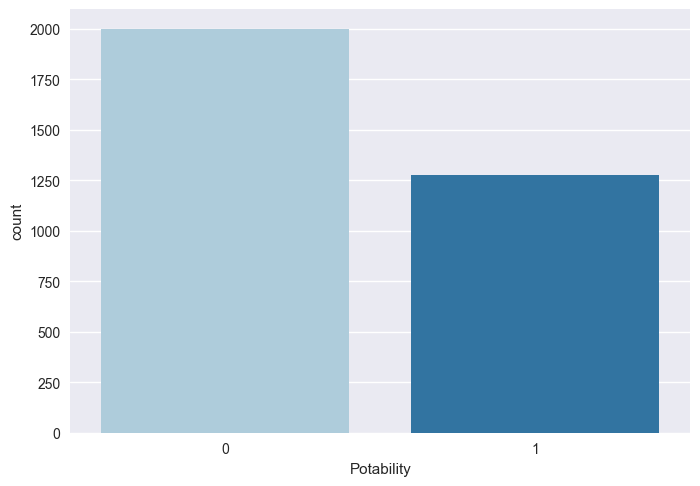

In [25]:
sns.countplot(water_data, x='Potability', palette='Paired');

In [26]:
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Valid:\n', y_valid.value_counts(normalize=True), sep='')

Train:
Potability
0    0.620229
1    0.379771
Name: proportion, dtype: float64
Valid:
Potability
0    0.568598
1    0.431402
Name: proportion, dtype: float64


In [27]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=.2, random_state=1)
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Valid:\n', y_valid.value_counts(normalize=True), sep='')

Train:
Potability
0    0.609924
1    0.390076
Name: proportion, dtype: float64
Valid:
Potability
0    0.609756
1    0.390244
Name: proportion, dtype: float64


In [28]:
skf = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, valid_index in skf.split(X, y): 
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]
    print('Train:\n', y_train.value_counts(normalize=True), sep='')
    print('Valid:\n', y_valid.value_counts(normalize=True), sep='')
    print('-'*40)

Train:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
Valid:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
----------------------------------------
Train:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
Valid:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
----------------------------------------
Train:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
Valid:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
----------------------------------------


In [29]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42, #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик
print(metrics.classification_report(y_valid, y_valid_pred)) 

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       400
           1       0.81      0.55      0.65       256

    accuracy                           0.77       656
   macro avg       0.78      0.73      0.74       656
weighted avg       0.78      0.77      0.76       656



In [30]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42, #генератор случайных чисел
    class_weight='balanced' #веса классов
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик    
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       400
           1       0.63      0.76      0.69       256

    accuracy                           0.73       656
   macro avg       0.72      0.73      0.72       656
weighted avg       0.74      0.73      0.73       656



In [31]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел 
)
#Обучаем модель
model.fit(X_train, y_train)
#Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(
                                                    model, 
                                                    X_train, 
                                                    y_train, 
                                                    cv=skf,
                                                    method='predict_proba'
                                                    )

In [32]:
#Выделяем столбец с вероятностями для класса 1 
y_cv_proba_pred = y_cv_proba_pred[:, 1]

In [33]:
#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

print('Thresholds:', thresholds[:5])
print('Precision scores:', precision[:5])
print('Recall scores:',recall[:5])

Thresholds: [0.         0.02739726 0.02898551 0.05       0.07407407]
Precision scores: [0.39007634 0.50050659 0.50357873 0.50437919 0.5043837 ]
Recall scores: [1.         0.9667319  0.96379648 0.95792564 0.95694716]


Best threshold = 0.33, F1-Score = 0.69


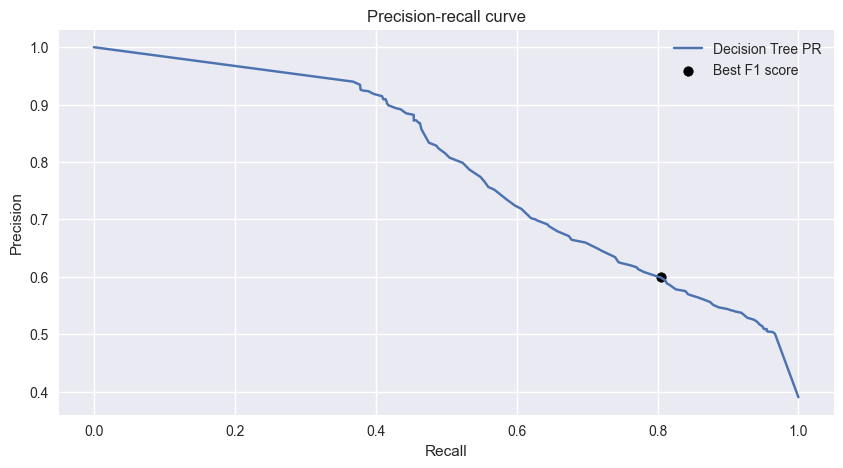

In [34]:
#Вычисляем F1-меру при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даем графику название и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [35]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.33
#Образцы воды, для которых вероятность быть пригодными для питья > threshold_opt, относим к классу 1
#В противном случае — к классу 0
y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]
y_valid_pred = (y_valid_pred_proba > threshold_opt).astype('int')
#Считаем метрики
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       400
           1       0.62      0.76      0.68       256

    accuracy                           0.73       656
   macro avg       0.72      0.73      0.72       656
weighted avg       0.74      0.73      0.73       656



In [36]:
print('PR AUC: {:.2f}'.format(metrics.auc(recall, precision)))

PR AUC: 0.79
